Tyler Beaulieu  
DS5020, Spring 2025   
February 18, 2025

<h4 style="text-align:center;">Homework 6</h4>

In [1]:
#Import Pandas and Numpy
import numpy as np
import matplotlib.pyplot as plt

You are free to use either R or Python for the programming exercises. Please refrain from using libraries. Please write your code using only linear algebra concepts as opposed to using libraries. I would anticipate that this entire assignment can be completed only with the use of numpy for those who will use Python.

We begin this assignment with an example where a least squares approximation is not required and then we generalize the problem so that it is required.

#### Polynomial interpolation
We begin this section with a theorem.

**Theorem 1.** Let $(x_1, y_1), (x_2, y_2), . . . , (x_n, y_n)$ be a collection of $n$ points in $\mathbb{R}^2$. There exists a unique $(n−1)$-order polynomial.

&emsp;$f(x)=b_0+b_1x+b_2x^2+...+b_{n-1}x^{n-1},$

*Proof.* Let $\mathbf{b}=(b_0,b_1,...,b_{n-1})'$ be the vector of coefficients and define the matrix $\mathbf{A} ∈ \mathbb{R}^{n×n}$ as consisting of columns

&emsp;$a_k=\begin{pmatrix}x_1^k\\x_2^k\\...\\x_n^k\end{pmatrix}∈\mathbb{R}^n$

for $k=0,1,...,n-1$. Since the columns of $\mathbf{A = \begin{bmatrix}a_0 & a_1 & ... & a_{n−1}\end{bmatrix}}$ are linearly independent then there exists a unique solution $\hat b ∈ \mathbb{R}^n$ such that

&emsp;**$\mathbf{y=A\hat b,}$**

where $\mathbf{y} = \begin{pmatrix}y_1 & y_2 & ... & y_n\end{pmatrix}'$, namely, $\mathbf{\hat b = A^{-1}y}$.


---------------------------

## Problem 1

**1.1** Write a program that simulates $n ∈ \mathbb{Z}_+$ data points $(x_i, y_i)$, for $i = 1, 2, . . . , n$. I would recommend using the standard normal probability distribution to simulate data.

In [2]:
#Function to simulate n data points
def prob1_1(n):
    x = np.random.randn(n)
    y = np.random.randn(n)
    return x,y

#Using function to simulate 8 data points
x,y=prob1_1(8)
print(x)
print(y)


[ 0.34026385 -1.3395909   1.36941033  1.26856757  0.12838729  1.57396616
 -0.44180877  1.28060374]
[ 1.80084552  0.41288281  0.1011745  -0.15859399 -0.20380467 -0.3580065
 -0.09352196 -1.64786585]


**1.2** Write a program that accepts as input the vectors $\mathbf{x, y} ∈ \mathbb{R}^n$ consisting of

&emsp;$\mathbf{x}=\begin{pmatrix} x_1 \\ x_2 \\ ... \\ x_n \end{pmatrix}$&emsp;$\mathbf{y}=\begin{pmatrix} y_1 \\ y_2 \\ ... \\ y_n \end{pmatrix}$

and computes the vector of coefficients $\mathbf{\hat b = A^{-1}y}$.

In [3]:
#Function that computes the vector of coefficients b_hat.
def prob1_2(x,y):
    #Get n
    n = int(len(x))

    #Build matrix A
    a = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            a[i][j]=x[i]**(j)

    #Calculate b_hat
    a_inv = np.linalg.inv(a)
    b_hat = np.matmul(a_inv,y)
    return b_hat

#Running an example
x=[1,2,3]
y=[4,5,6]
print(prob1_2(x,y))

[3. 1. 0.]


**1.3** Write a program that computes

&emsp;$\hat f(x)=\hat b_0+\hat b_1x+...+\hat b_{n-1}x^{n-1}$.

for any $x∈\mathbb{R}$. I would recommend implementing Horner's rule.

In [4]:
#Function that evaluates f(x) for any x 

def prob1_3(x,b_hat):
    #Use Horner's Method to computer f(x)
    fx = b_hat[len(b_hat)-1]
    for b in range(len(b_hat) - 2, -1, -1):
        fx = fx*x + b_hat[b]
    return fx

#Run an example
print(prob1_3(2,[1,2,3,4,5]))

129


**1.4** Write a script that can produce plots that look somewhat like the following examples. 

<img src="pics/1_4.png" width ="650">

I encourage you to consider a wide range of n-values in order to see how the constraints, i.e., the $n$ data points, cause the polynomial to exhibit erratic behavior.

C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',c='black')
C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fx,fy,'-r',c='black')


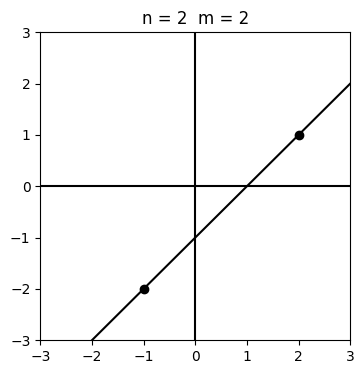

In [5]:
#Function that plots points and polynomials generated earlier.
def prob1_4(x,y,b_hat):
    
    #Get polynomial function points
    fx = np.linspace(-3,3,31)
    fy = np.zeros(31)
    for index in range(31):
        fy[index] = prob1_3(fx[index],b_hat)

    #Generate the Plot
    plt.figure(figsize=(4,4))
    plt.plot(x,y,'ro',c='black')
    plt.plot(fx,fy,'-r',c='black')
    plt.title("n = "+str(len(x))+"  m = "+str(len(b_hat)))
    plt.xlim([-3,3])
    plt.ylim([-3,3])
    plt.axvline(x=0, c='black')
    plt.axhline(y=0, c='black')


#Plot 1
x=np.array([-1,2])
y=np.array([-2,1])
b_hat = prob1_2(x,y)
prob1_4(x,y,b_hat)

C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',c='black')
C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fx,fy,'-r',c='black')


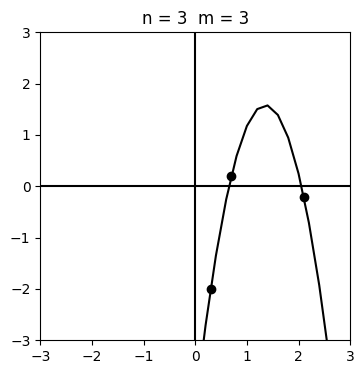

In [6]:
#Plot 2
x=np.array([.3,.7,2.1])
y=np.array([-2,.2,-.2])
b_hat = prob1_2(x,y)
prob1_4(x,y,b_hat)

C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',c='black')
C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fx,fy,'-r',c='black')


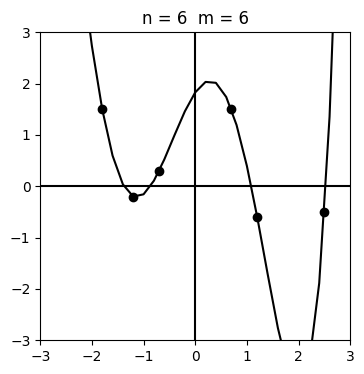

In [7]:
#Plot 3
x=np.array([-1.8,-1.2,-0.7,0.7,1.2,2.5])
y=np.array([1.5,-0.2,0.3,1.5,-0.6,-0.5])
b_hat = prob1_2(x,y)
prob1_4(x,y,b_hat)

C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',c='black')
C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fx,fy,'-r',c='black')


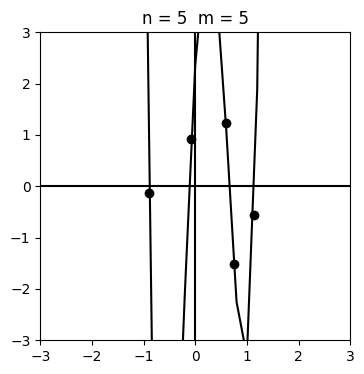

In [8]:
#Plot with 7 points
x,y=prob1_1(5)
b_hat = prob1_2(x,y)
prob1_4(x,y,b_hat)

---------------------------

## Problem 2

#### Least squares with polynomial basis
Once again, let $(x_1, y_1), (x_2, y_2), . . . , (x_n, y_n)$ be a collection of $n$ points in $\mathbb{R}^2$ for some $n ∈ \mathbb{Z}_+$. Suppose now, however, that one does not wish to perfectly fit the data points (which occurs in nearly 100% of cases) but would prefer instead to find a low-order polynomial approximation to the data points.

Let $0 ≤ m < n$ be an integer and define the $(m − 1)$-order polynomial $g(x)$ as

&emsp;$g(x)=b_0+b_1x+...+b_{m-1}x^{m-1}$

&emsp;&emsp;$\sum_{j=1}^{m-1} b_jx^j$

We seek $g(x)$ such that
$\sum_{i=1}^{n} (y_i-g(x_i))^2$ is minimized. Let $y ∈ \mathbb{R}^n$ be defined as in Equation (1) and
define the matrix $\mathbf{A} ∈ \mathbb{R}^{n×m}$ as consisting of columns

&emsp;$a_k=\begin{pmatrix}x_1^k\\x_2^k\\...\\x_n^k\end{pmatrix}∈\mathbb{R}^n$

for $k = 0, 1, . . . ,m − 1$. That is, $\mathbf{A} = \begin{bmatrix}a_0& a_1 &. . . &a_{m−1}\end{bmatrix}$. We seek $b ∈ \mathbb{R}^m$ such that the quantity $∥\mathbf{y − Ab}∥^2$ is minimized.



**2.1** Write the normal equations for this least squares problem and then determine an expression for $\hat b
∈ \mathbb{R}^m$, the coefficients of the polynomial

&emsp;$\hat g(x)=\hat b_0+\hat b_1x+...+\hat b_{m-1}x^{m-1}$

that minimizes $∥\mathbf{y − Ab}∥^2=\sum_{i=1}^{n} (y_i-g(x_i))^2$.


>&emsp;Where
>
>&emsp;&emsp;$\mathbf{A}=\begin{pmatrix}x_1^0&x_1^1&...&x_1^m\\x_2^0&...\\...&&...\\x_n^0&&&x_n^m\end{pmatrix}$
>
>&emsp;Solving the normal equations for $\hat b$.
>
>&emsp;&emsp;$\mathbf{A^TA\hat b=A^Ty}$
>
>&emsp;&emsp;$\mathbf{\hat b=(A^TA)^{-1}(A^Ty)}$

**2.2** Write a program that accepts as input $\mathbf{x, y} ∈ \mathbb{R}^n$, as defined in Equation (1), and computes the vector of coefficients $\hat b$.

C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',c='black')
C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fx,fy,'-r',c='black')


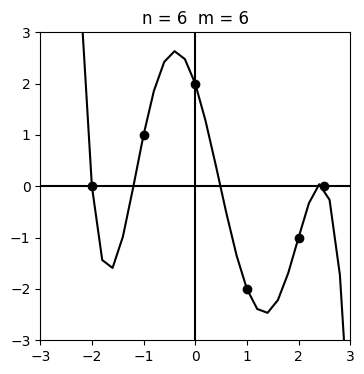

In [9]:
#This function takes as inputs x, and computes the matrix A with m = n-1
def matrixa(x):
    #Build matrix A for m = n
    a = np.zeros((len(x),len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            a[i][j]=x[i]**j
    return a

#This function takes as inputs the vectors x and y and the integer m, and computes the coefficients b.
def prob2_2(x,y,m):
    a = matrixa(x)
    a = a[:,:m]
    aT = np.transpose(a)
    aTa = np.matmul(aT,a)
    aTa_inv = np.linalg.inv(aTa)
    aTy = np.matmul(aT,y)
    b_hat = np.matmul(aTa_inv,aTy)
    return b_hat
 
#Generate and plot an example.
x=[-2,-1,0,1,2,2.5]
y=[0,1,2,-2,-1,0]
b = prob2_2(x,y,6)
prob1_4(x,y,b)

**2.3** Use your program from 1.1 to simulate $n ∈ \mathbb{Z}_+$ data points $\mathbf{x, y} ∈ \mathbb{R}^n$ and store these values. These same values must be used in each of the following subproblems.

In [10]:
x1,y1=prob1_1(4)
x1,y1

(array([ 0.39266495, -1.32610575, -0.70870139,  2.12114786]),
 array([ 0.15842322, -1.27034706,  0.07422778,  2.0629128 ]))

**2.3a** Write a program that computes the squared error $\sum_{i=1}^{n} (y_i-g(x_i))^2$ for any set of coefficients in the polynomial.

In [11]:
#Compute the squared error for any two vectors x and y, and integer m
def prob2_3a(x,y,m):
    b = prob2_2(x,y,m)
    err=0
    for i in range(len(x)):
        gx = prob1_3(x[i],b)
        err+=(y[i]-gx)**2
    return float(err)

#Run an example.
prob2_3a(x1,y1,2)

0.4790670516831068

**2.3b** For the data points that you recently simulated and stored, fit an $(m − 1)$-order polynomial to the data points, for $m = 1, 2, . . . , n$ and compute the squared error loss $\sum_{i=1}^{n} (y_i-g(x_i))^2$ for each value of $m$. Produce a plot of these values with squared error loss along the vertical axis and $m = 0, 1, . . . , n − 1$ along the horizontal axis.

C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,y,'ro',c='black')
C:\Users\tyler\AppData\Local\Temp\ipykernel_24300\1283331051.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(fx,fy,'-r',c='black')


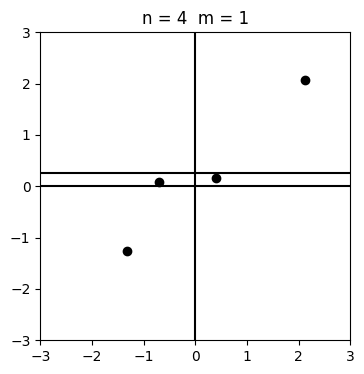

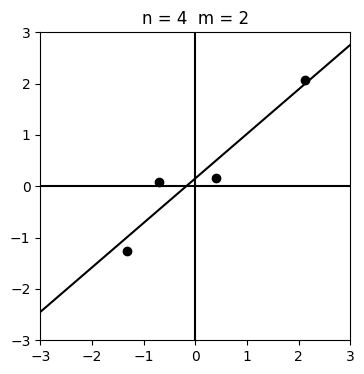

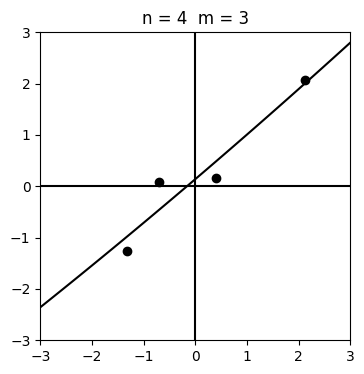

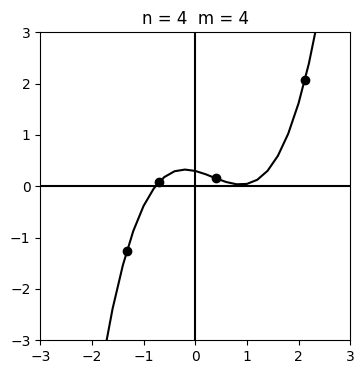

In [12]:
# m = 1
b1 = prob2_2(x1,y1,1)
e1 = prob2_3a(x1,y1,1)
prob1_4(x1,y1,b1)

# m = 2
b2 = prob2_2(x1,y1,2)
e2 = prob2_3a(x1,y1,2)
prob1_4(x1,y1,b2)

# m = 3
b3 = prob2_2(x1,y1,3)
e3 = prob2_3a(x1,y1,3)
prob1_4(x1,y1,b3)

# m = 4
b4 = prob2_2(x1,y1,4)
e4 = prob2_3a(x1,y1,4)
prob1_4(x1,y1,b4)

Text(0.5, 1.0, 'Error vs Polynomial Order')

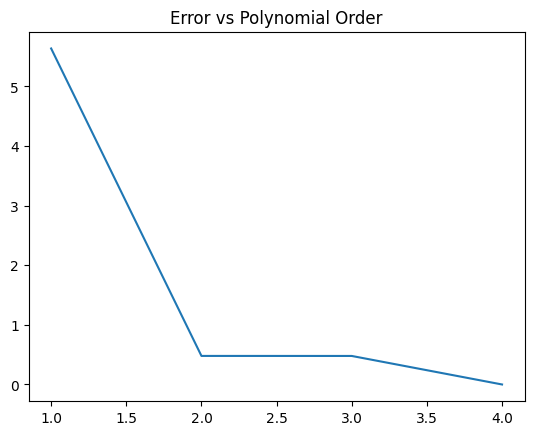

In [13]:
#Plot error against the value of m
m1=[1,2,3,4]
err=[e1,e2,e3,e4]

plt.plot(m1,err)
plt.title('Error vs Polynomial Order')

**2.4** We will now simulate data, so that we have knowledge of the true relationship between $x, y ∈ \mathbb{R}$.

**2.4a** Program this function.

&emsp;$\mathbf{Input:}\newline$
&emsp;$n: \text{number of data points } (x_i, y_i)\newline$
&emsp;$m: \text{one more than the order of the polynomial } g(x)\newline$
&emsp;$σ > 0: \text{the standard deviation of the error terms}\newline$
&emsp;$\text{Assumption: }m < n\newline$
&emsp;$\mathbf{Output:}\newline$
&emsp;$\mathbf{x, y} ∈ \mathbb{R}^n: \text{the simulated data}\newline$
&emsp;$\mathbf{b} ∈ \mathbb{R}^m: \text{the vector of coefficients used to simulate the data}\newline$
***
&emsp;$x ∈ \mathbb{R}^n ∼ N(\mathbf{0, I}); $&emsp;$\text{// x consists of }n\text{ independent standard normal random variables.}\newline$
&emsp;$b ∈ \mathbb{R}^m ∼ N(\mathbf{0, I}); $&emsp;$\text{// b consists of }m\text{ independent standard normal random variables.}\newline$
&emsp;$ϵ ∈ \mathbb{R}^n ∼ N(\mathbf{0, σ^2I}); $&emsp;$\text{// ϵ consists of }n\text{ independent normal random variables with}\newline$&emsp;$\text{mean 0 and standard deviation σ.}\newline$
&emsp;$\text{Initialize } y ∈ \mathbb{R}^n\newline$
&emsp;$\text{for } i = 1, 2, . . . , n \text{ do}\newline$
&emsp;$y_i ← \text{Horner}(\mathbf{b}, x_i);\newline$
&emsp;$\mathbf{end}\newline$
&emsp;$\mathbf{return\text{ } x, y, b}$

Please see https://en.wikipedia.org/wiki/Horner%27s_method for more information on Horner’s rule.

In [18]:
#Programming the above function
def prob2_4a(n,m,dev):
    #Generate random x and b
    x,b = prob1_1(n)
    b=b[0:m]

    #Initialize y
    y=np.zeros(n)

    for yi in range(n):
        y[yi]=prob1_3(x[yi],b)

    return x,y,b

#Example
x2,y2,b2=prob2_4a(3,3,0.5)
x2,y2,b2

(array([-0.53790887,  0.36074283,  0.65779256]),
 array([-0.58464024, -0.1873177 ,  0.14128382]),
 array([-0.454586  ,  0.5405288 ,  0.55539397]))

**2.4b** For $m = 0, 1, . . . , n − 1$, find the best fit polynomial to the data simulated by the program in Exercise 2.4a.

>Where $n = 3$.

In [19]:
#m = 2
bm2 = prob2_2(x2,y2,2)
print("m = 2")
print(bm2)

#m = 1
bm1 = prob2_2(x2,y2,1)
print("m = 1")
print(bm1)

#m = 0
bm0 = prob2_2(x2,y2,0)
print("m = 0")
print(bm0)

m = 2
[-0.30134466  0.56875738]
m = 1
[-0.21022471]
m = 0
[]


**2.4c** Use your program from 2.3a and compute the squared error loss by the least squares approximation, i.e., low-order polynomial fit, to the data for polynomials of order $m = 0, 1, . . . , n − 1$. Produce a plot of these values with squared error loss along the vertical axis and values of m along the horizontal axis.

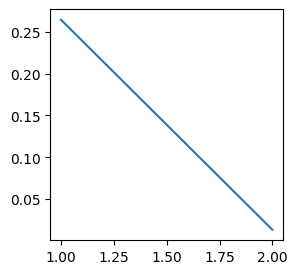

In [25]:
#m = 2
err2 = prob2_3a(x2,y2,2)

#m = 1
err1 = prob2_3a(x2,y2,1)

ms = [1,2]
errs = [err1,err2]
plt.figure(figsize=(3,3))
plt.plot(ms,errs)



**2.5** Now that you are able to simulate $n ∈ \mathbb{R}^n$ data points in $\mathbb{R}^2$ from a polynomial of a given order, and that you are able to estimate the coefficients of a polynomial of any order $m = 0, 1, . . . , n − 1$, and that you are able to compute the error of approximation through the squared error loss function, please experiment with situations in which
- $m^∗$: the order of the polynomial that generated the data
- $m$: the order of the polynomial that you will fit to the data via least squares approximation
- $n$: sample size
- $σ$: standard deviation of the random errors.

Note that it must be that $n > m$ and that $n > m^∗$ in order for your programs to run properly. Produce some interesting plots that may suggest that the squared error loss $\sum_{i=1}^{n} (y_i-g(x_i))^2$ is generally minimized around $m ≈ m^∗$.

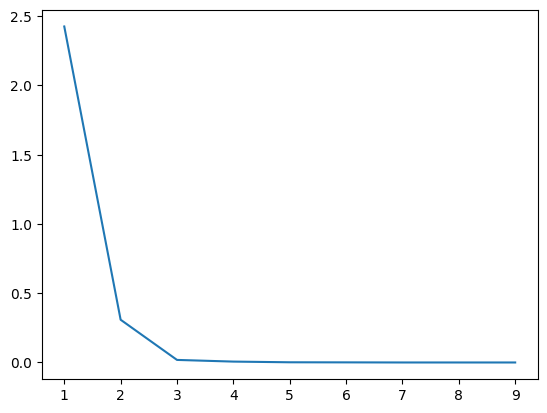

In [ ]:
#Create plot of errors for all m
def prob2_5(x,y,m):
    err = []
    ms = []
    for mstar in range(1,m+1):
        ms.append(mstar)
        err.append(prob2_3a(x,y,mstar))
    plt.plot(ms,err)

#Plot n=10 errors
x25,y25,b25=prob2_4a(10,9,1)
prob2_5(x25,y25,9)